<a href="https://colab.research.google.com/github/kenzfinn/csc1035_lecture_examples/blob/master/Part2_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

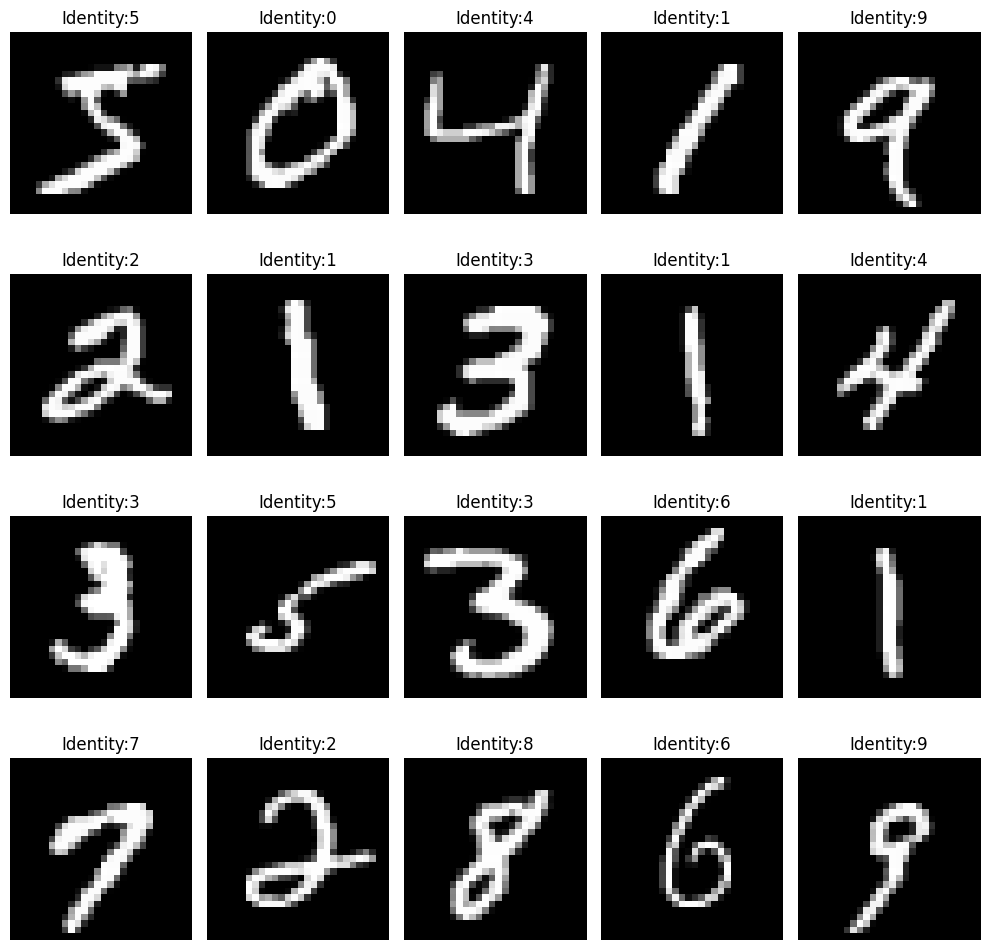

In [2]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)
#this starting code allows us to open the MNIST dataset and set the images to the X list and the labels to the y list
figure, axes = plt.subplots(4, 5, figsize=(10, 10))
#creates subplots for the images to be displayed, 4 rows with 5 columns
axes = axes.ravel()
#creates a 1D array out of the 2D array

for i in range(20):
  image = X[i].reshape(28,28)
  #there is 784 bits in this image therefore needs to be made into 28x28 grid
  axes[i].imshow(image, cmap='grey')
  #renders the image as gray on the grid
  axes[i].axis('off')
  #gets rid of the axis so it looks like an image rather the subplot
  axes[i].set_title('Identity:' +y[i])
  #identifier

plt.tight_layout()
plt.show()


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import (
    LogisticRegression,
)

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

scaler = StandardScaler()
XScale = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(XScale, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, solver='saga', penalty='l1', tol= 0.05)
#use saga


param_grid = {'C': [1, 3, 4, 5, 10, 50]}
grid_search = GridSearchCV(log_reg, param_grid, cv=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
print(results)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
print(best_model)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")




   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0      48.581902      3.417851         0.162217        0.009155        1   
1      48.439846      2.551365         0.147584        0.000729        3   
2      46.258856      2.401907         0.149033        0.002132        4   
3      47.701527      3.193346         0.229582        0.084384        5   
4      46.617314      2.670033         0.147694        0.000599       10   
5      40.534115      3.996476         0.125075        0.020588       50   

      params  split0_test_score  split1_test_score  mean_test_score  \
0   {'C': 1}           0.878857           0.883321         0.881089   
1   {'C': 3}           0.878929           0.883607         0.881268   
2   {'C': 4}           0.878964           0.883214         0.881089   
3   {'C': 5}           0.878821           0.883607         0.881214   
4  {'C': 10}           0.879143           0.883857         0.881500   
5  {'C': 50}           0.879143          

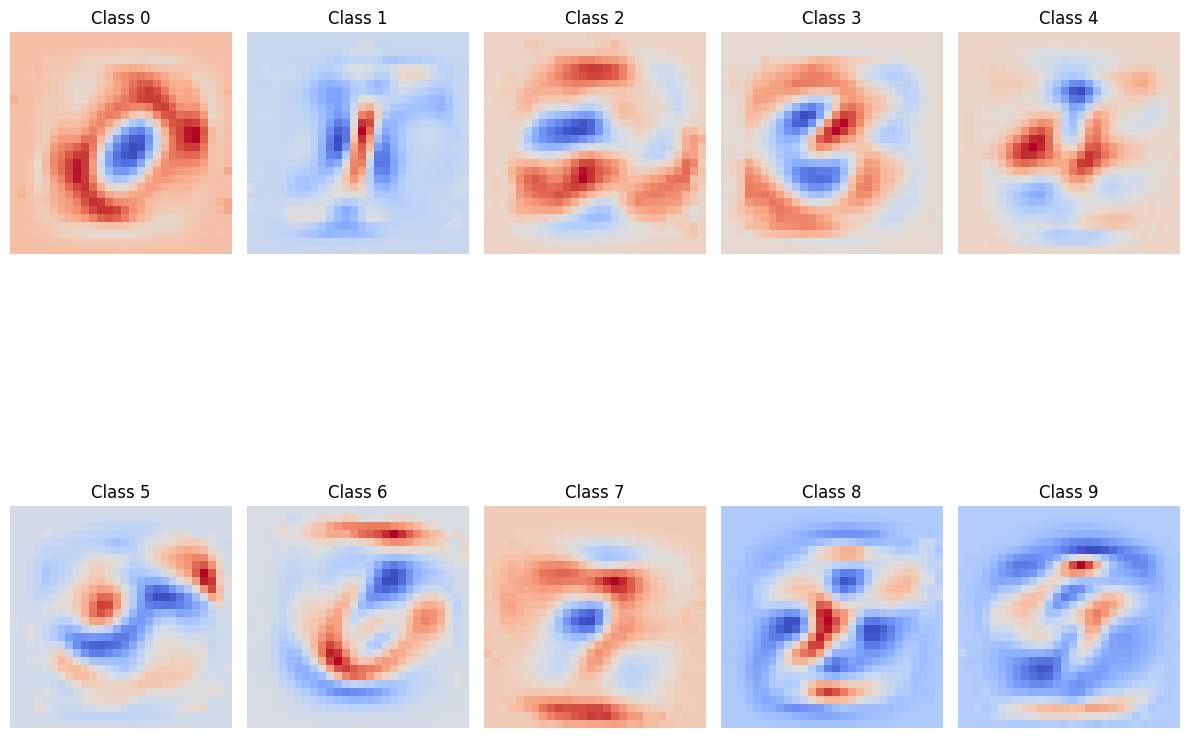

In [4]:
coefficients = best_model.coef_
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(coefficients[i].reshape(28, 28), cmap='coolwarm', interpolation='nearest')
    plt.title(f"Class {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

Number of components for 80% variance: 146


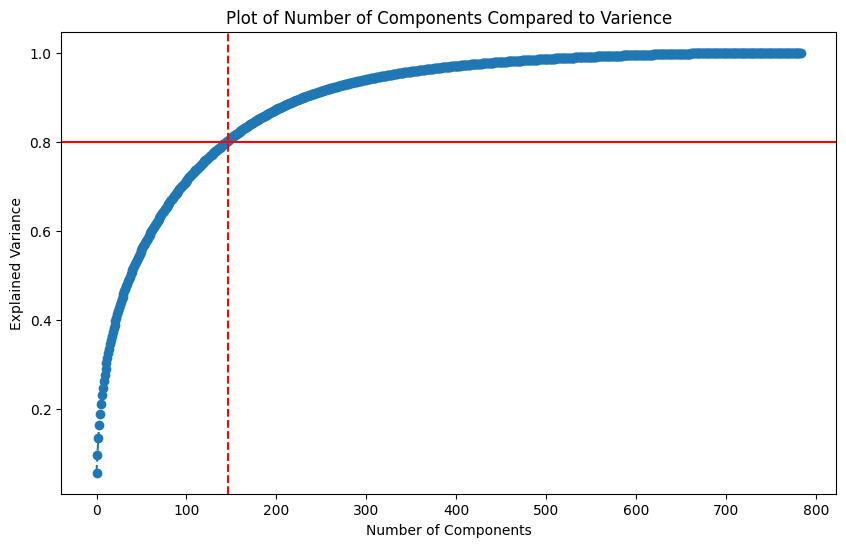

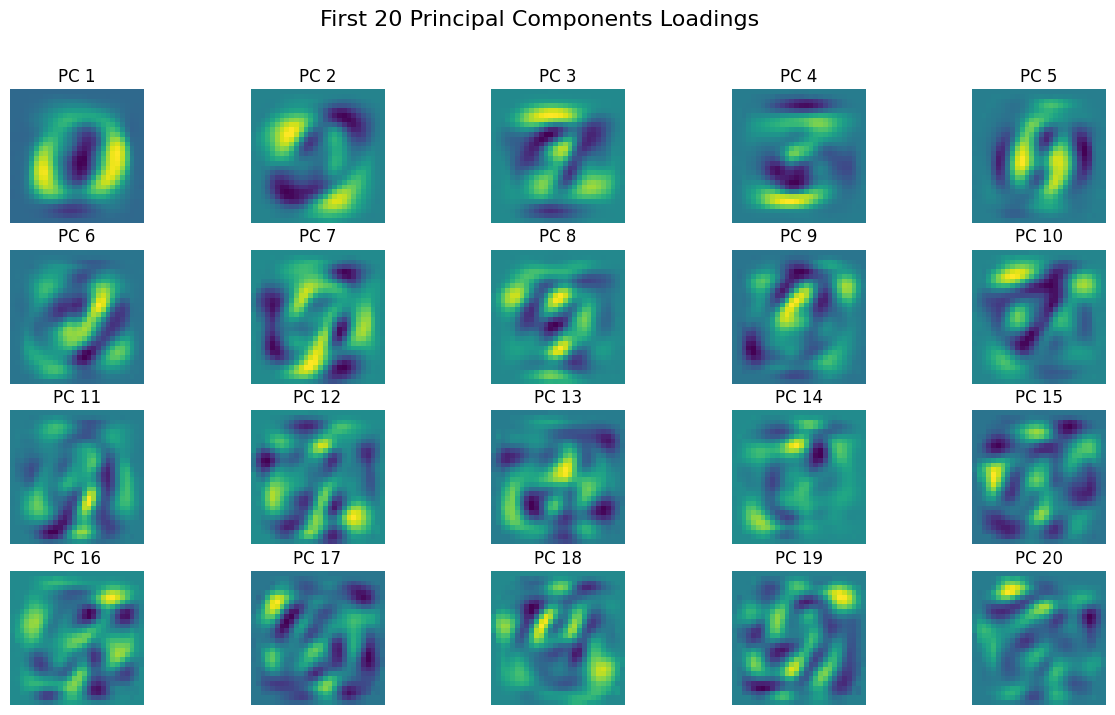

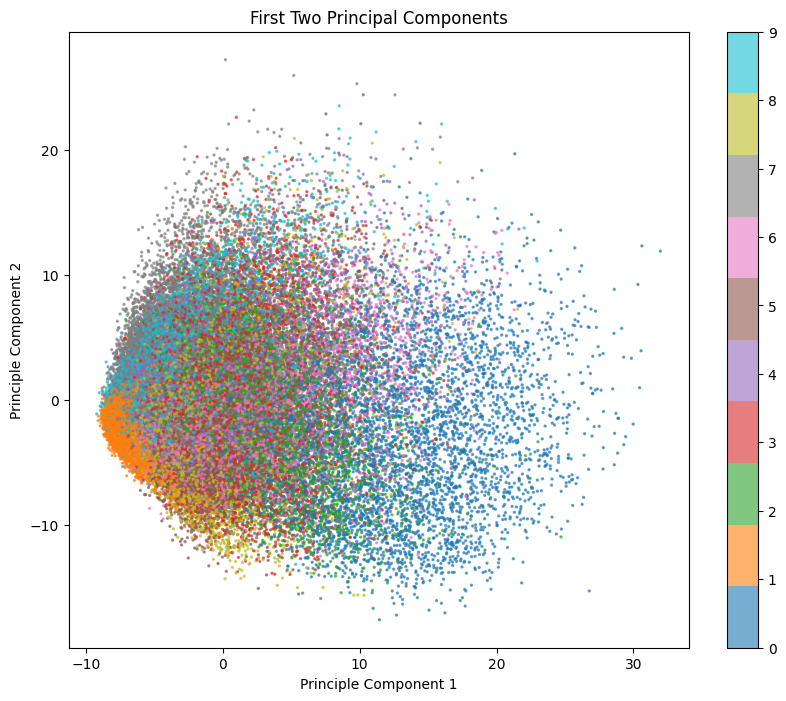

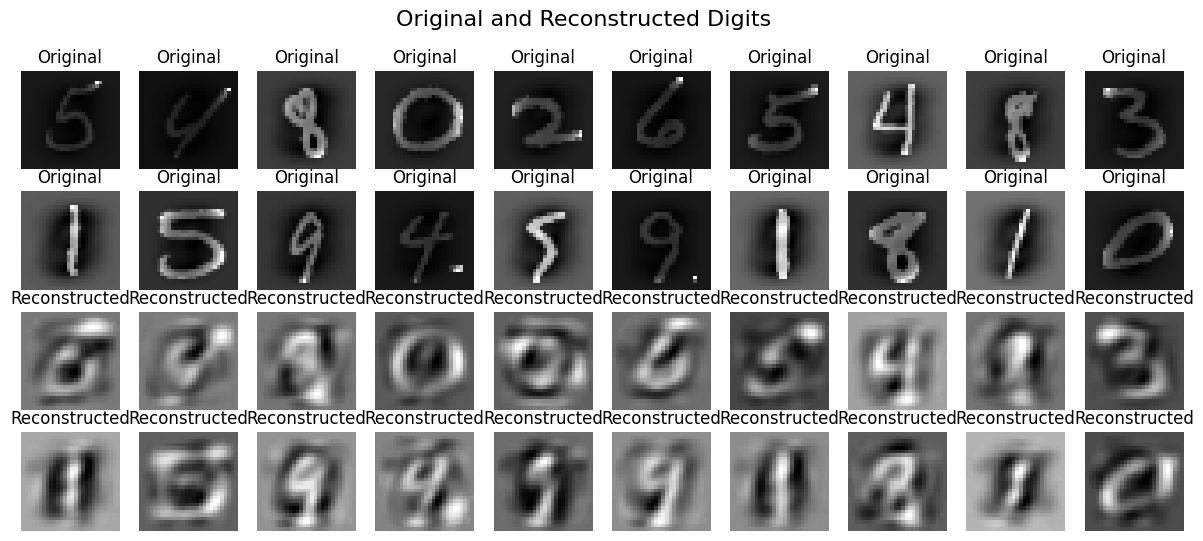

In [8]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
#use built in function to fit PCA to MNIST dataset

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
components_for_80 = np.argmax(cumulative_variance >= 0.8) + 1
#finds the component number that is equilivant to 80& variance

print(f"Number of components for 80% variance: {components_for_80}")
#tells us number of components needed for 80% variance so can be left from cluttering graph

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
#line at y=0.8 since y scale(0,1) so 0.8 represents the 80% wanted
plt.axvline(x=components_for_80, color='r', linestyle='--')
plt.title('Plot of Number of Components Compared to Varience')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_train)

# Plot the loadings
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='viridis')
    plt.title(f'PC {i+1}')
    plt.axis('off')
plt.suptitle('First 20 Principal Components Loadings', fontsize=16)
plt.show()


pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_train)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_train.astype(int), cmap='tab10', alpha=0.6, s=2)
plt.colorbar(scatter)
plt.title('First Two Principal Components')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.show()

pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X_train)
X_reconstructed = pca.inverse_transform(X_reduced)


plt.figure(figsize=(15, 6))
for i in range(20):
    #subplot of the MNIST dataset without changes
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    #subplot of the MNIST dataset when dimensionality has been reduced
    plt.subplot(4, 10, i + 21)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle('Original and Reconstructed Digits', fontsize=16)
plt.show()

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

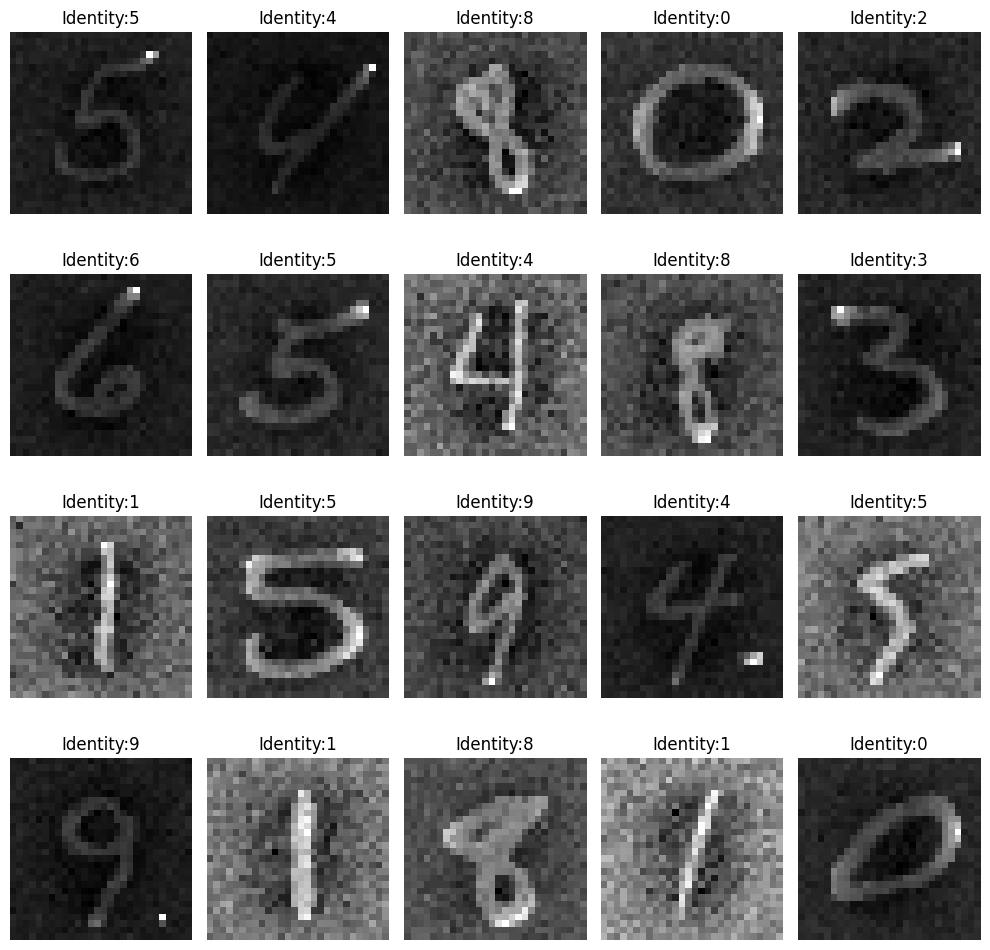

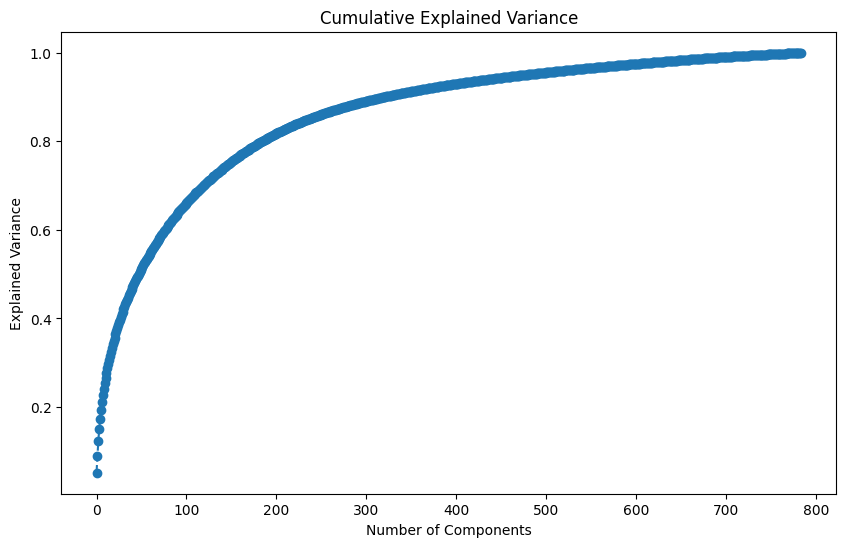

Number of components for 80% variance: 185
Number of components for 95% variance: 477


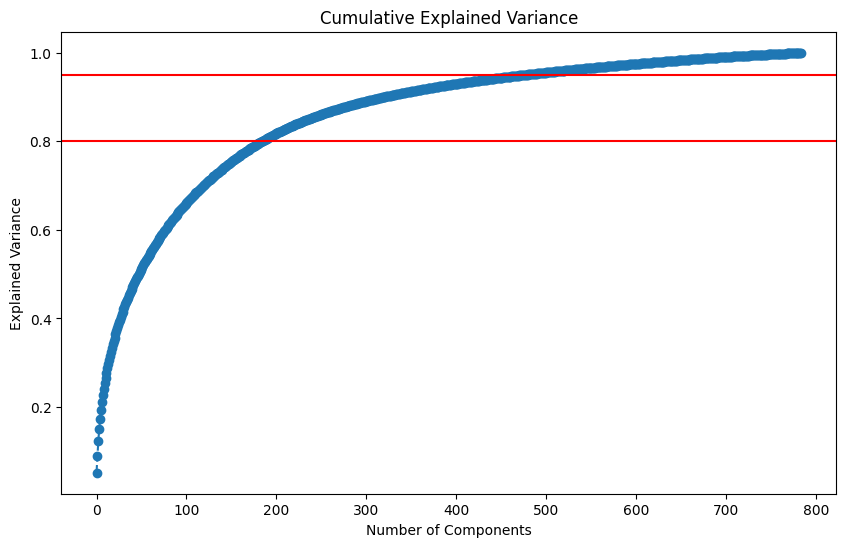

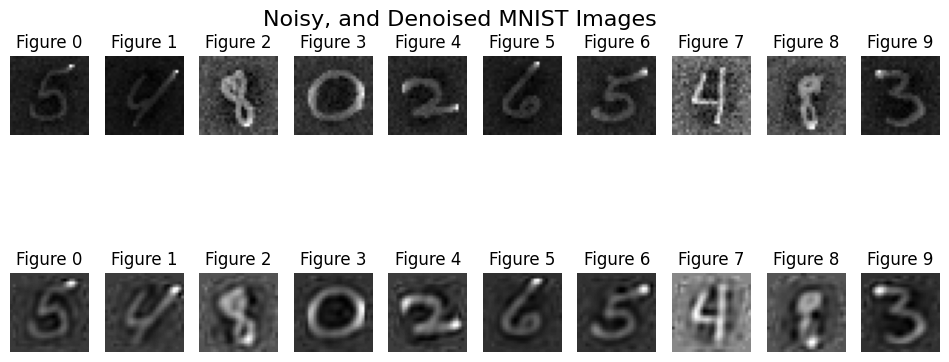

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

noise = 0.3
XNoisy = X_train + np.random.normal(0, noise, X_train.shape)


figure, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(20):
    image = XNoisy[i].reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Identity:' + y_train[i])

plt.tight_layout()
plt.show()



pca = PCA()
pca.fit(XNoisy)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
components_for_80 = np.argmax(cumulative_variance >= 0.8) + 1
components_for_95 = np.argmax(cumulative_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()
#same code for plotting componets vs variance but without lines

#95% variance is typically preferred however this would mean essientially looking at all the components
print(f"Number of components for 80% variance: {components_for_80}")
print(f"Number of components for 95% variance: {components_for_95}")
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

pca = PCA(n_components=components_for_80)
X_noisy_reduced = pca.fit_transform(XNoisy)
X_reconstructed = pca.inverse_transform(X_noisy_reduced)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(3, 10, i + 21)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title(f"Figure {i}")
    plt.axis('off')
    if i == 0:
        plt.ylabel("Denoised", fontsize=12)

    plt.subplot(3, 10, i + 1)
    plt.imshow(XNoisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"Figure {i}")
    plt.axis('off')

plt.suptitle("Noisy, and Denoised MNIST Images", fontsize=16)
plt.show()

